#### Step 1: Importare le librerie
#### Step 2: Caricare il dataset. Inserire il percorso del file CSV
#### Step 3: Visualizzare le prime righe del dataset
#### Step 4: Visualizzare il numero di righe e colonne
#### Step 5: Visualizzare i tipi di dati
#### Step 6: Statistiche descrittive

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\massi\PycharmProjects\siamoTesi\data\us_car_data.csv')

print(df.head())

print(f"Numero di righe e colonne: {df.shape}")

print(f"Tipi di dati:\n{df.dtypes}")

print(f"Statistiche descrittive:\n{df.describe()}")

      County       City State  Postal Code  Model Year    Make    Model  \
0   Thurston   Tumwater    WA        98512        2019   TESLA  MODEL 3   
1     Island    Clinton    WA        98236        2022  NISSAN     LEAF   
2  Snohomish  Snohomish    WA        98290        2020   TESLA  MODEL 3   
3       King    Seattle    WA        98134        2020   TESLA  MODEL 3   
4  Snohomish    Edmonds    WA        98020        2013   TESLA  MODEL S   

         Electric Vehicle Type  \
0  Battery Electric Vehicle      
1  Battery Electric Vehicle      
2  Battery Electric Vehicle      
3  Battery Electric Vehicle      
4  Battery Electric Vehicle      

                                                CAFV  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             220   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle Eligible             266   
3            Clean Alternative Fuel Vehicle Eligible    

Eliminare le colonne non necessarie. Verificare se lo stato è lo stesso per tutti i record.

In [54]:
df_cleaned = df.drop(columns=['DOL Vehicle ID', 'Legislative District', 'Postal Code', '2020 Census Tract'])

unique_states = df_cleaned['State'].nunique()  # Conta il numero di valori unici

if unique_states == 1:
    print(f"Tutti i record appartengono allo stesso stato: {df_cleaned['State'].unique()[0]}")
else:
    print(f"Il dataset contiene {unique_states} stati differenti: {df_cleaned['State'].unique()}")


Tutti i record appartengono allo stesso stato: WA


Dato che tutti i record hanno stato WA, eliminiamo la colonna in quanto superflua

In [55]:
df_cleaned = df_cleaned.drop(columns=['State'])  # Usa df_cleaned qui

print(df_cleaned.head())


      County       City  Model Year    Make    Model  \
0   Thurston   Tumwater        2019   TESLA  MODEL 3   
1     Island    Clinton        2022  NISSAN     LEAF   
2  Snohomish  Snohomish        2020   TESLA  MODEL 3   
3       King    Seattle        2020   TESLA  MODEL 3   
4  Snohomish    Edmonds        2013   TESLA  MODEL S   

         Electric Vehicle Type  \
0  Battery Electric Vehicle      
1  Battery Electric Vehicle      
2  Battery Electric Vehicle      
3  Battery Electric Vehicle      
4  Battery Electric Vehicle      

                                                CAFV  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             220   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle Eligible             266   
3            Clean Alternative Fuel Vehicle Eligible             322   
4            Clean Alternative Fuel Vehicle Eligible             208   

   Base MSRP             

Creiamo 3 grafici: 

`Auto per anno di produzione`: Un grafico a barre per mostrare quante auto sono state registrate ogni anno.

`Auto per marca e modello`: Un grafico a barre per visualizzare il numero di auto registrate suddivise per marca e modello.

`Auto per città`: Un grafico a barre per visualizzare il numero di auto registrate in ciascuna città.

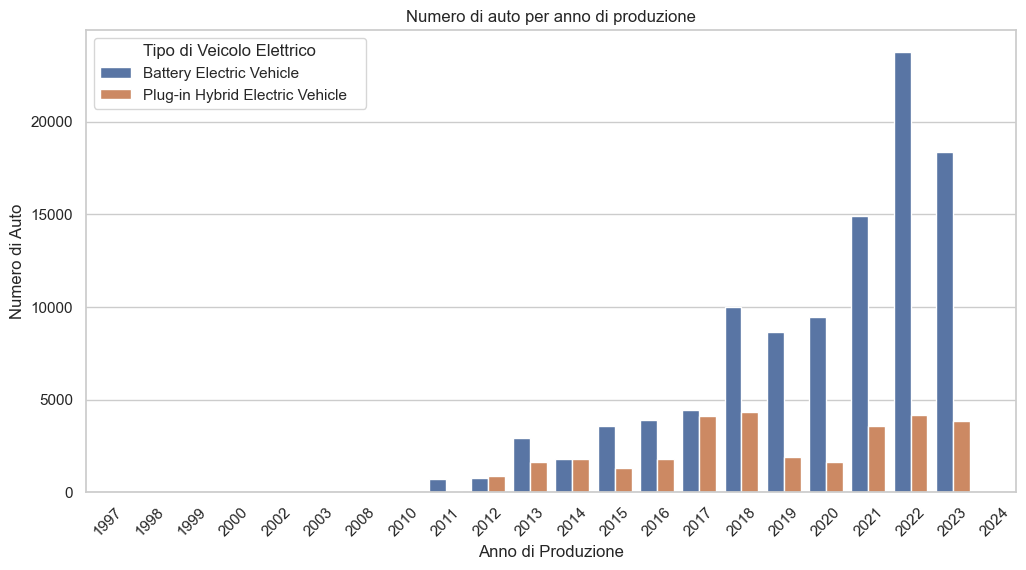

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Model Year', hue='Electric Vehicle Type')
plt.title('Numero di auto per anno di produzione')
plt.xlabel('Anno di Produzione')
plt.ylabel('Numero di Auto')
plt.xticks(rotation=45)
plt.legend(title='Tipo di Veicolo Elettrico')
plt.show()

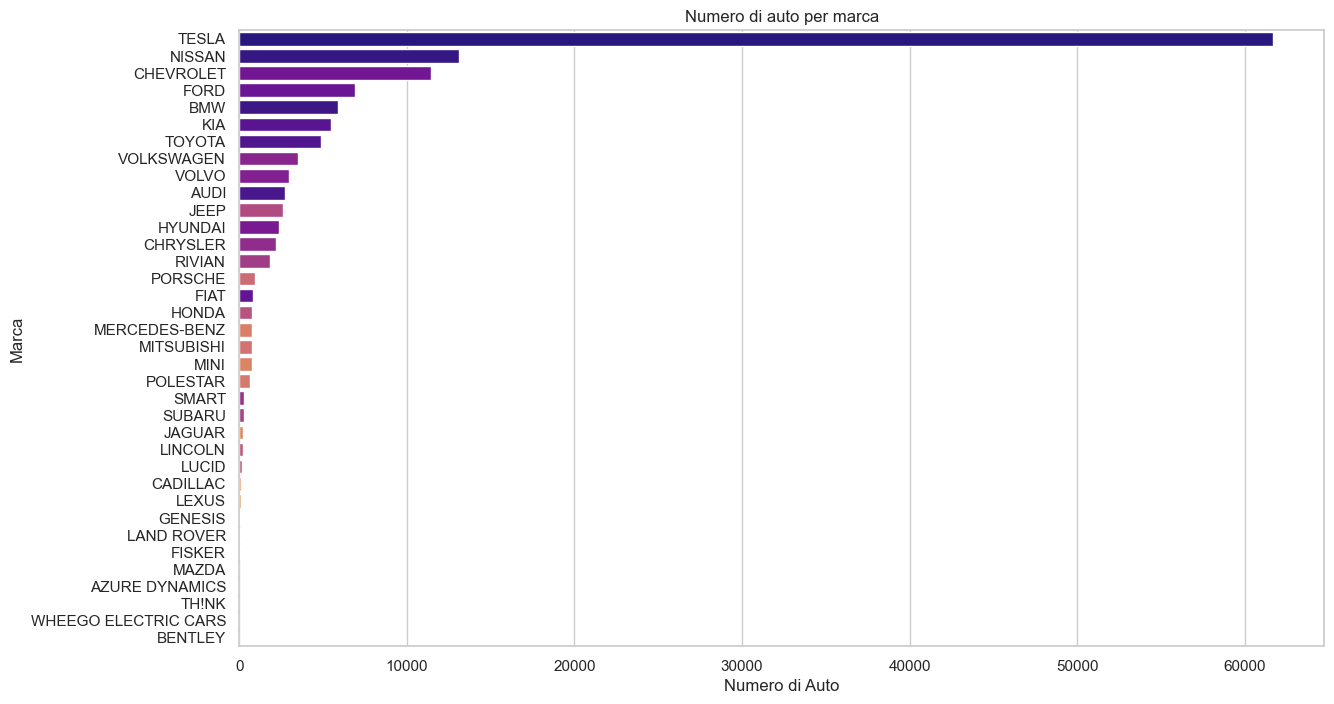

In [57]:
# Grafico 2: Numero di auto per marca
plt.figure(figsize=(14, 8))
sns.countplot(data=df_cleaned, y='Make', order=df_cleaned['Make'].value_counts().index, palette='plasma', hue='Make')
plt.title('Numero di auto per marca')
plt.xlabel('Numero di Auto')
plt.ylabel('Marca')
plt.show()


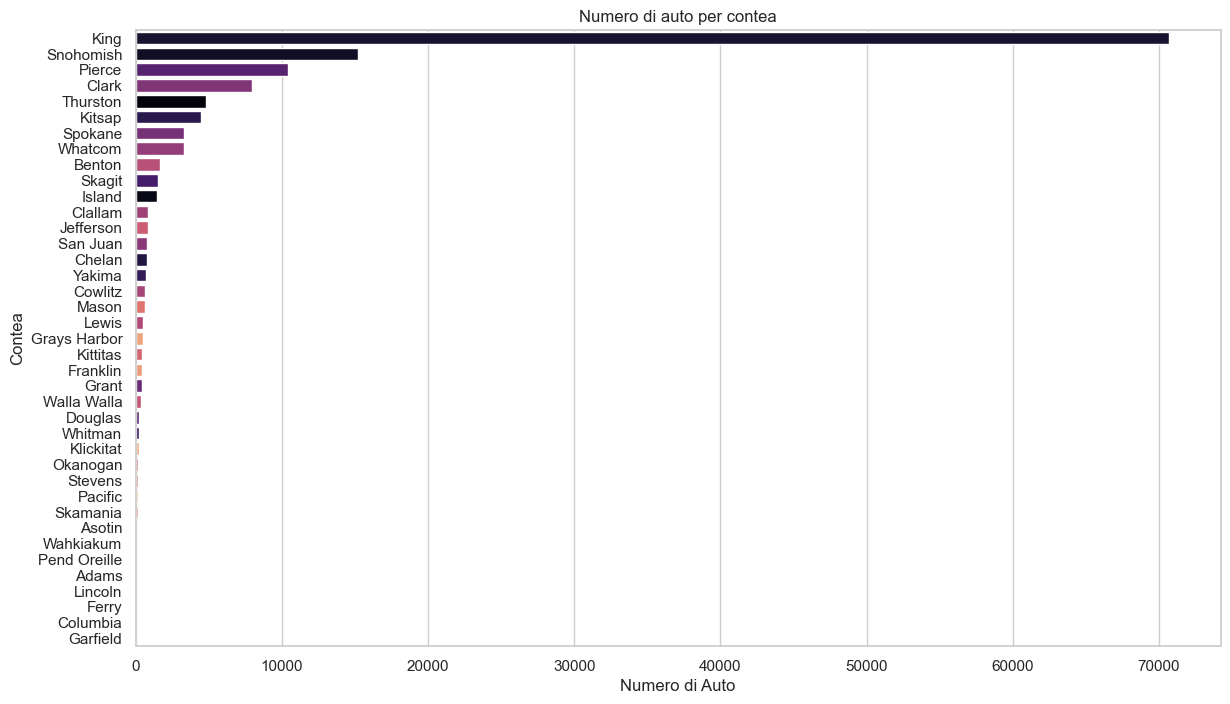

In [58]:
# Grafico 3: Numero di auto per contea
plt.figure(figsize=(14, 8))
sns.countplot(data=df_cleaned, y='County', order=df_cleaned['County'].value_counts().index, palette='magma', hue='County')
plt.title('Numero di auto per contea')
plt.xlabel('Numero di Auto')
plt.ylabel('Contea')
plt.show()

Dai grafici si evince che il mercato è dominato da alcuni marchi più popolari, che hanno venduto prevalmentemente negli ultimi anni. Inoltre, alcune contee sembrano avere più veicoli elettrici di altre. Di conseguenza andiamo a scremare il dataset, escludendo quei record che non raggiungono una certa soglia di popolarità del marchio e selezioniamo solo le 10 contee con più registrazioni.

In [59]:
# Seleziona le marche che hanno più di 100 veicoli registrati (puoi modificare la soglia in base alle tue necessità)
popular_brands = df_cleaned['Make'].value_counts()
popular_brands = popular_brands[popular_brands > 500].index  # Marche con più di 100 auto

# Filtrare il dataset per mantenere solo le auto delle marche popolari
df_filtered = df_cleaned[df_cleaned['Make'].isin(popular_brands)]


Prendo le prime 10 contee

In [60]:
top_10_counties = df_filtered['County'].value_counts().head(10).index  

# Filtrare il dataset per mantenere solo le auto delle prime 10 contee
df_filtered = df_filtered[df_filtered['County'].isin(top_10_counties)]

#print(df_filtered.head())

Rifaccio il grafico delle marche

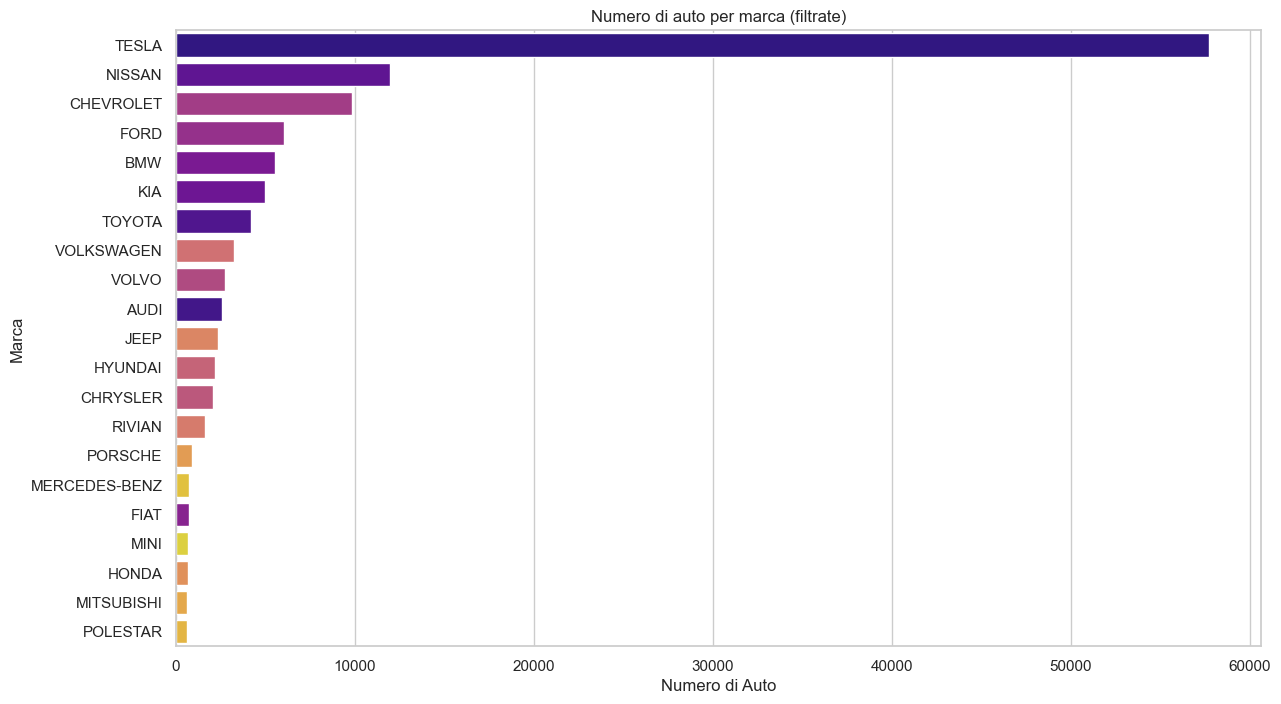

In [61]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_filtered, y='Make', order=df_filtered['Make'].value_counts().index, palette='plasma', hue='Make')
plt.title('Numero di auto per marca (filtrate)')
plt.xlabel('Numero di Auto')
plt.ylabel('Marca')
plt.show()


Rifaccio il grafico delle contee

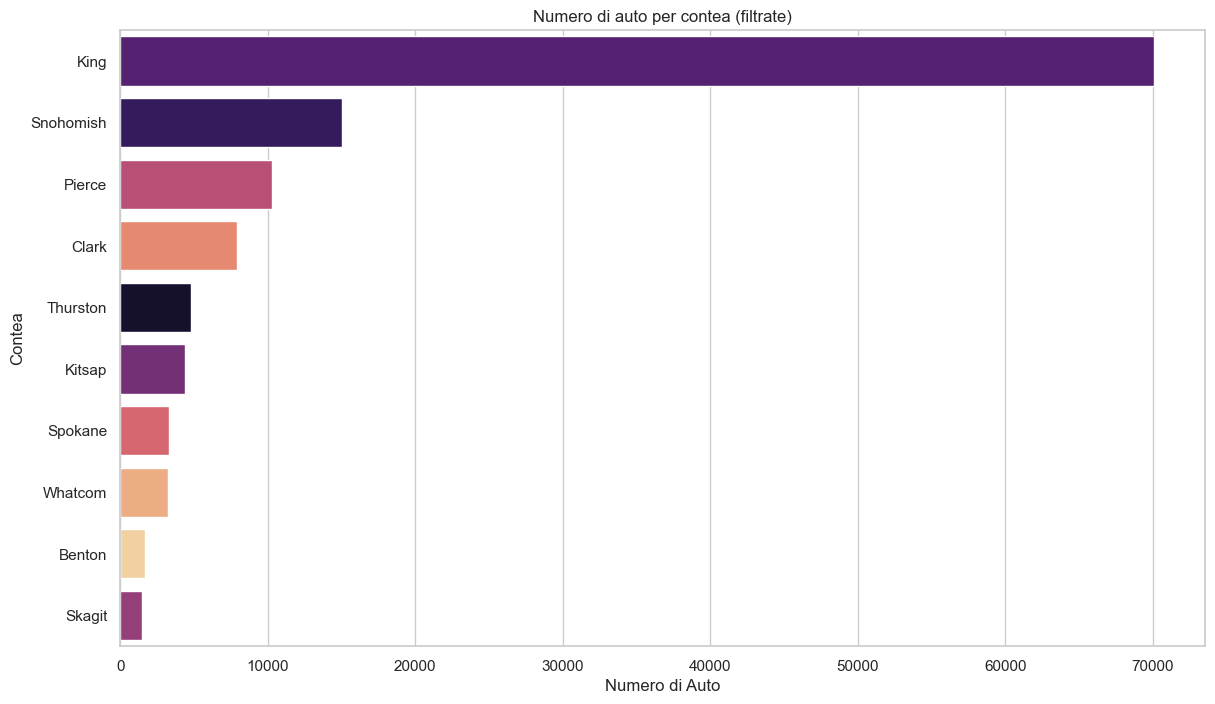

In [62]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_filtered, y='County', order=df_filtered['County'].value_counts().index, palette='magma', hue='County')
plt.title('Numero di auto per contea (filtrate)')
plt.xlabel('Numero di Auto')
plt.ylabel('Contea')
plt.show()


Calcolo quanti record ho rimosso

In [63]:
# Numero di righe nel dataset originale e in quello filtrato
rows_original = df.shape[0]
rows_filtered = df_filtered.shape[0]

# Calcolo della percentuale di dati rimossi
percentage_removed = ((rows_original - rows_filtered) / rows_original) * 100

# Stampa il numero di righe e colonne e la percentuale di dati rimossi
print(f"Numero di righe e colonne nel dataset originale: {df.shape}")
print(f"Numero di righe e colonne nel dataset filtrato: {df_filtered.shape}")
print(f"Percentuale di righe rimosse: {percentage_removed:.2f}%")

Numero di righe e colonne nel dataset originale: (134474, 17)
Numero di righe e colonne nel dataset filtrato: (122116, 12)
Percentuale di righe rimosse: 9.19%


Grafico 1: Distribuzione del prezzo (Base MSRP)

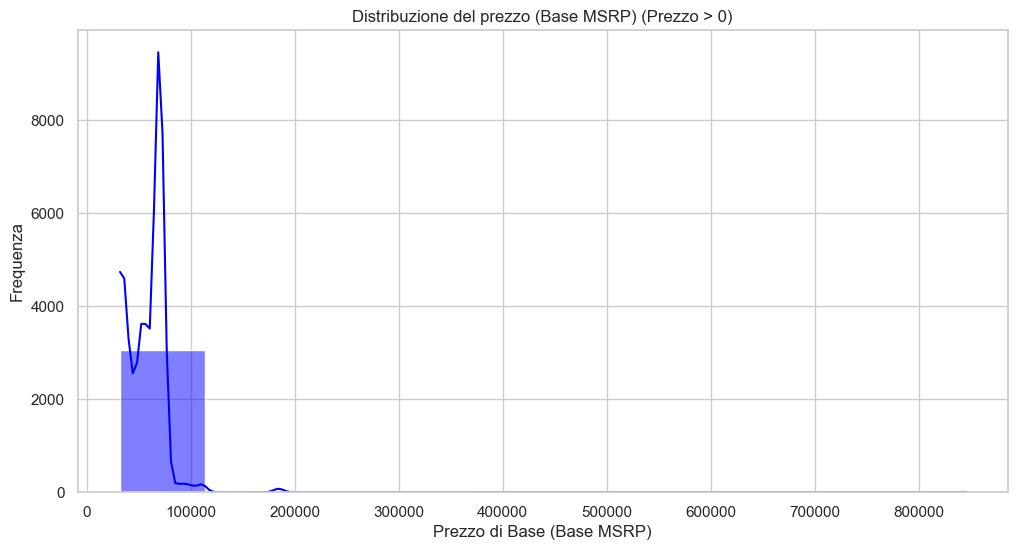

In [68]:
# Filtrare veicoli con prezzo Base MSRP pari a 0 o assente
df_filtered_msrp = df_filtered[df_filtered['Base MSRP'] > 0]

# Grafico aggiornato della distribuzione del prezzo
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered_msrp['Base MSRP'], kde=True, color='blue', bins=30)
plt.title('Distribuzione del prezzo (Base MSRP) (Prezzo > 0)')
plt.xlabel('Prezzo di Base (Base MSRP)')
plt.ylabel('Frequenza')
plt.show()

Grafico 2: Distribuzione dell'autonomia elettrica (Electric Range)

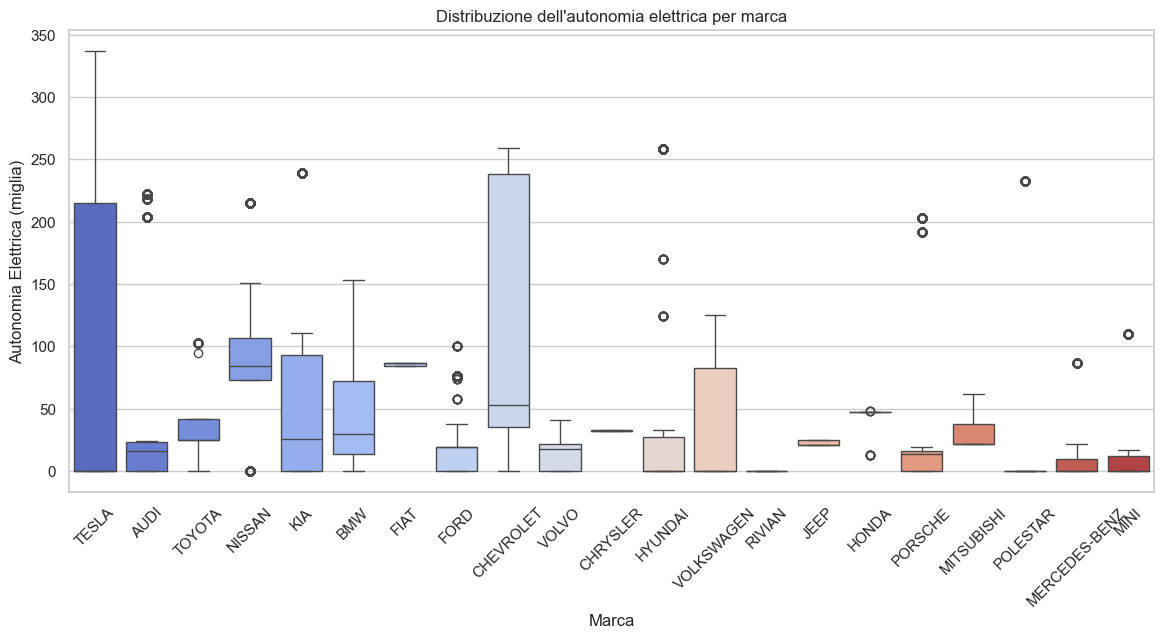

In [70]:
# Boxplot per mostrare la distribuzione dell'autonomia elettrica per marca
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_filtered, x='Make', y='Electric Range', palette='coolwarm', hue='Make')
plt.title('Distribuzione dell\'autonomia elettrica per marca')
plt.xlabel('Marca')
plt.ylabel('Autonomia Elettrica (miglia)')
plt.xticks(rotation=45)
plt.show()

Grafico 3: Tendenze nel tempo (numero di auto registrate per anno di produzione)

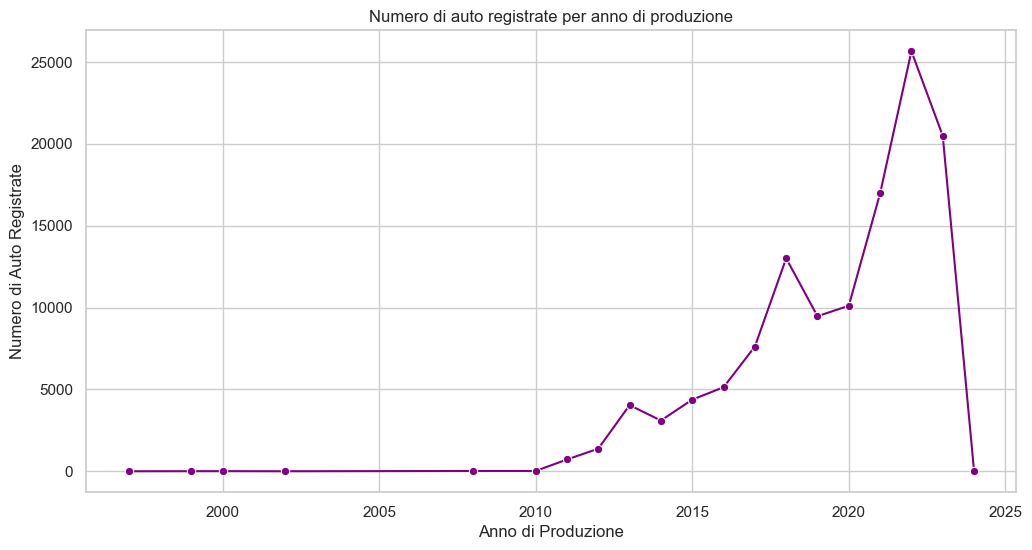

In [66]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered['Model Year'].value_counts().sort_index(), marker='o', color='purple')
plt.title('Numero di auto registrate per anno di produzione')
plt.xlabel('Anno di Produzione')
plt.ylabel('Numero di Auto Registrate')
plt.show()
